In [1]:
## MP 573 Lecture 15: Applications of the DFT - image reconstruction
##
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
#%matplotlib inline
%matplotlib notebook
import numpy as np
from IPython.display import display, Image, HTML
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
import math 
from PIL import Image

In [2]:
# Load some image from file
data_dir = pjoin('.', 'data')
mat_fname = pjoin(data_dir, 'brain_orig.mat')
mat_contents = sio.loadmat(mat_fname)
mat_contents
f = mat_contents['im_mr']
sx = len(f)
sy = len(f[:])

<IPython.core.display.Javascript object>


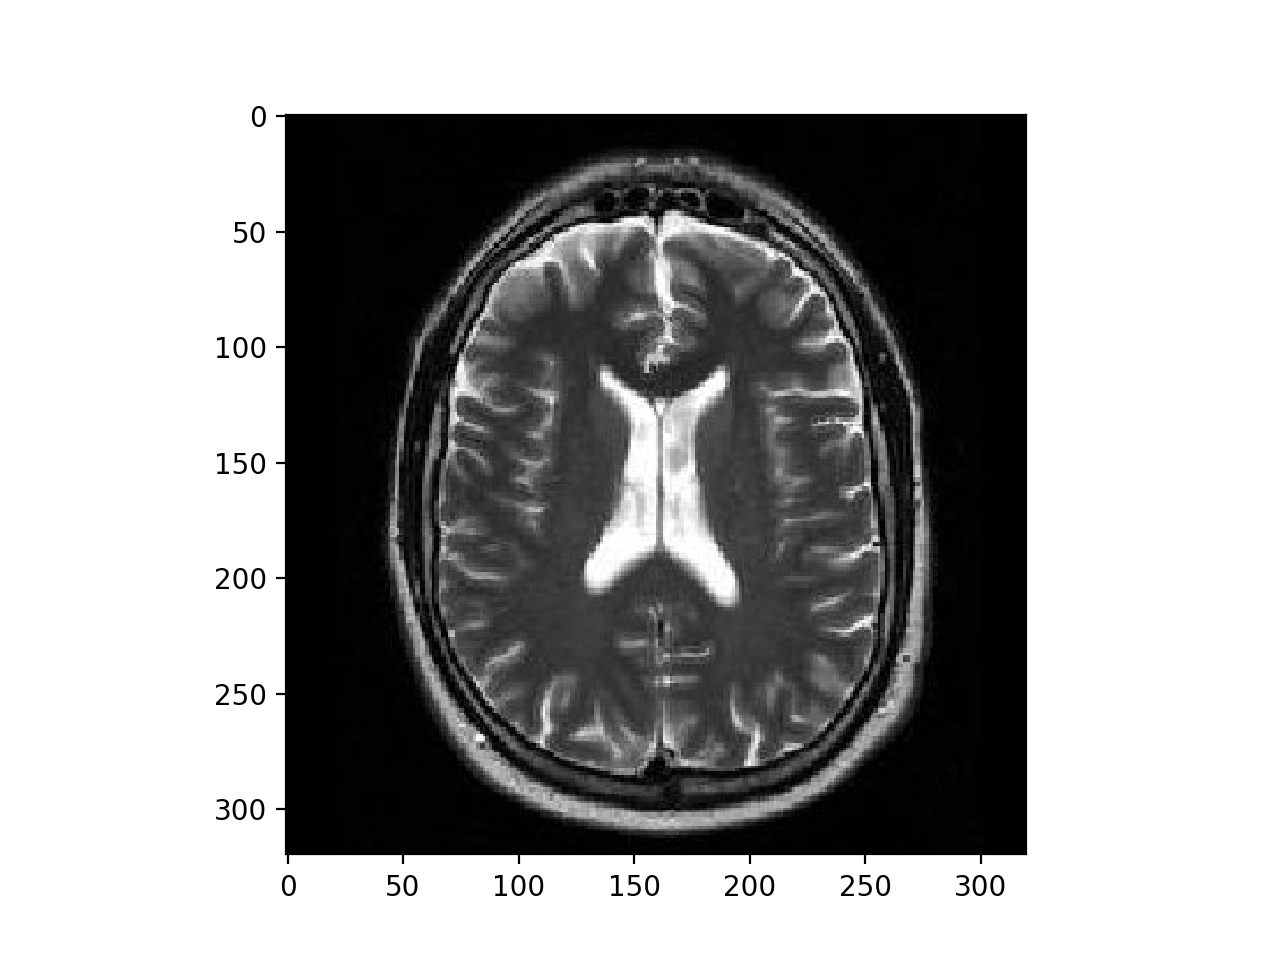

In [3]:
fig2 = plt.figure()
imgplot = plt.imshow(abs(f),cmap='gray')

<IPython.core.display.Javascript object>


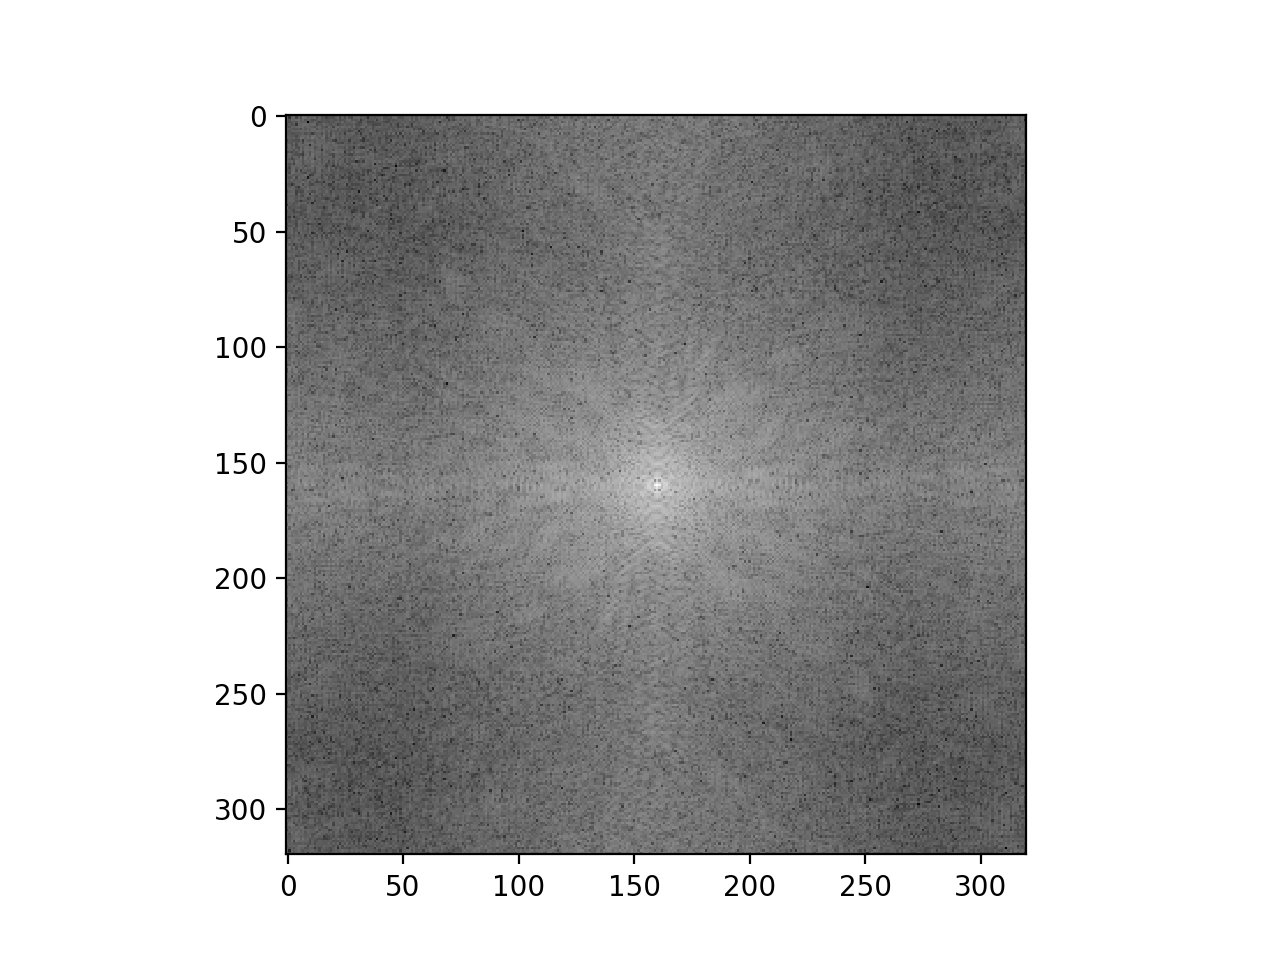

In [4]:
# Calculate and show the DFT
fhat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f)))
fig2 = plt.figure()
imgplot = plt.imshow(np.log(abs(fhat)),cmap='gray')

## Propagation of noise in DFT reconstruction

<IPython.core.display.Javascript object>


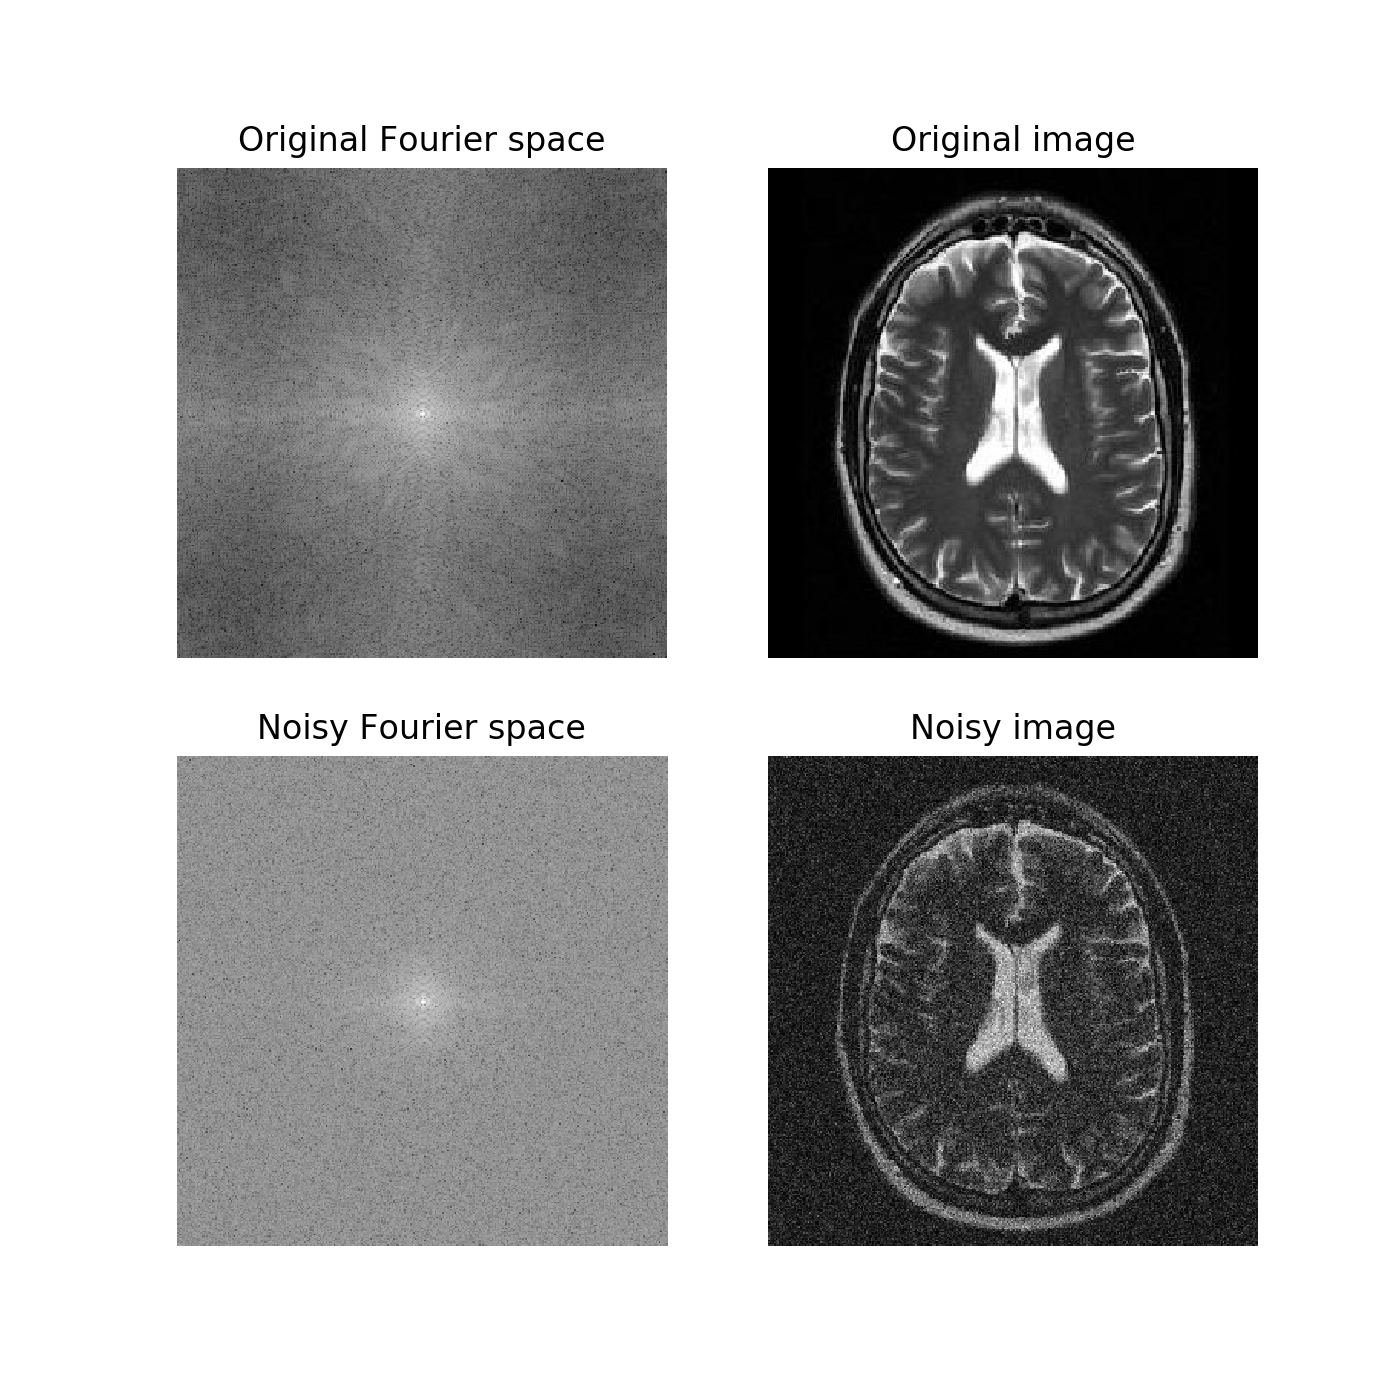

(-0.5, 319.5, 319.5, -0.5)

In [34]:
# Now add some noise or artifact to the data
fhat2 = fhat.copy(); 
#fhat2[145,148] = fhat2[40,30] + 10000 # Uncomment this line for spike in Fourier-space
#fhat2 = np.roll(fhat, 10, axis=0);# Uncomment for shift in k-space
#The next few lines add some Gaussian noise
sizex = len(fhat2)
sizey = len(fhat2[:])
std = 50
noise = np.random.normal(0,std,[sizex,sizey]) + np.random.normal(0,std,[sizex,sizey])*1j
fhat2 = fhat2 + noise # Uncomment to add noise

# Display Fourier-space signal and reconstructed image
plt.figure(figsize=(7,7))
plt.subplot(2,2,1)
imgplot = plt.imshow(np.log(abs(fhat)),cmap='gray')
f2 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat2)))
plt.title('Original Fourier space')
plt.axis('off')
plt.subplot(2,2,2)
imgplot = plt.imshow(abs(f),cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.subplot(2,2,3)
imgplot = plt.imshow(np.log(abs(fhat2)),cmap='gray')
f2 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat2)))
plt.title('Noisy Fourier space')
plt.axis('off')
plt.subplot(2,2,4)
imgplot = plt.imshow(abs(f2),cmap='gray')
plt.title('Noisy image')
plt.axis('off')

<IPython.core.display.Javascript object>


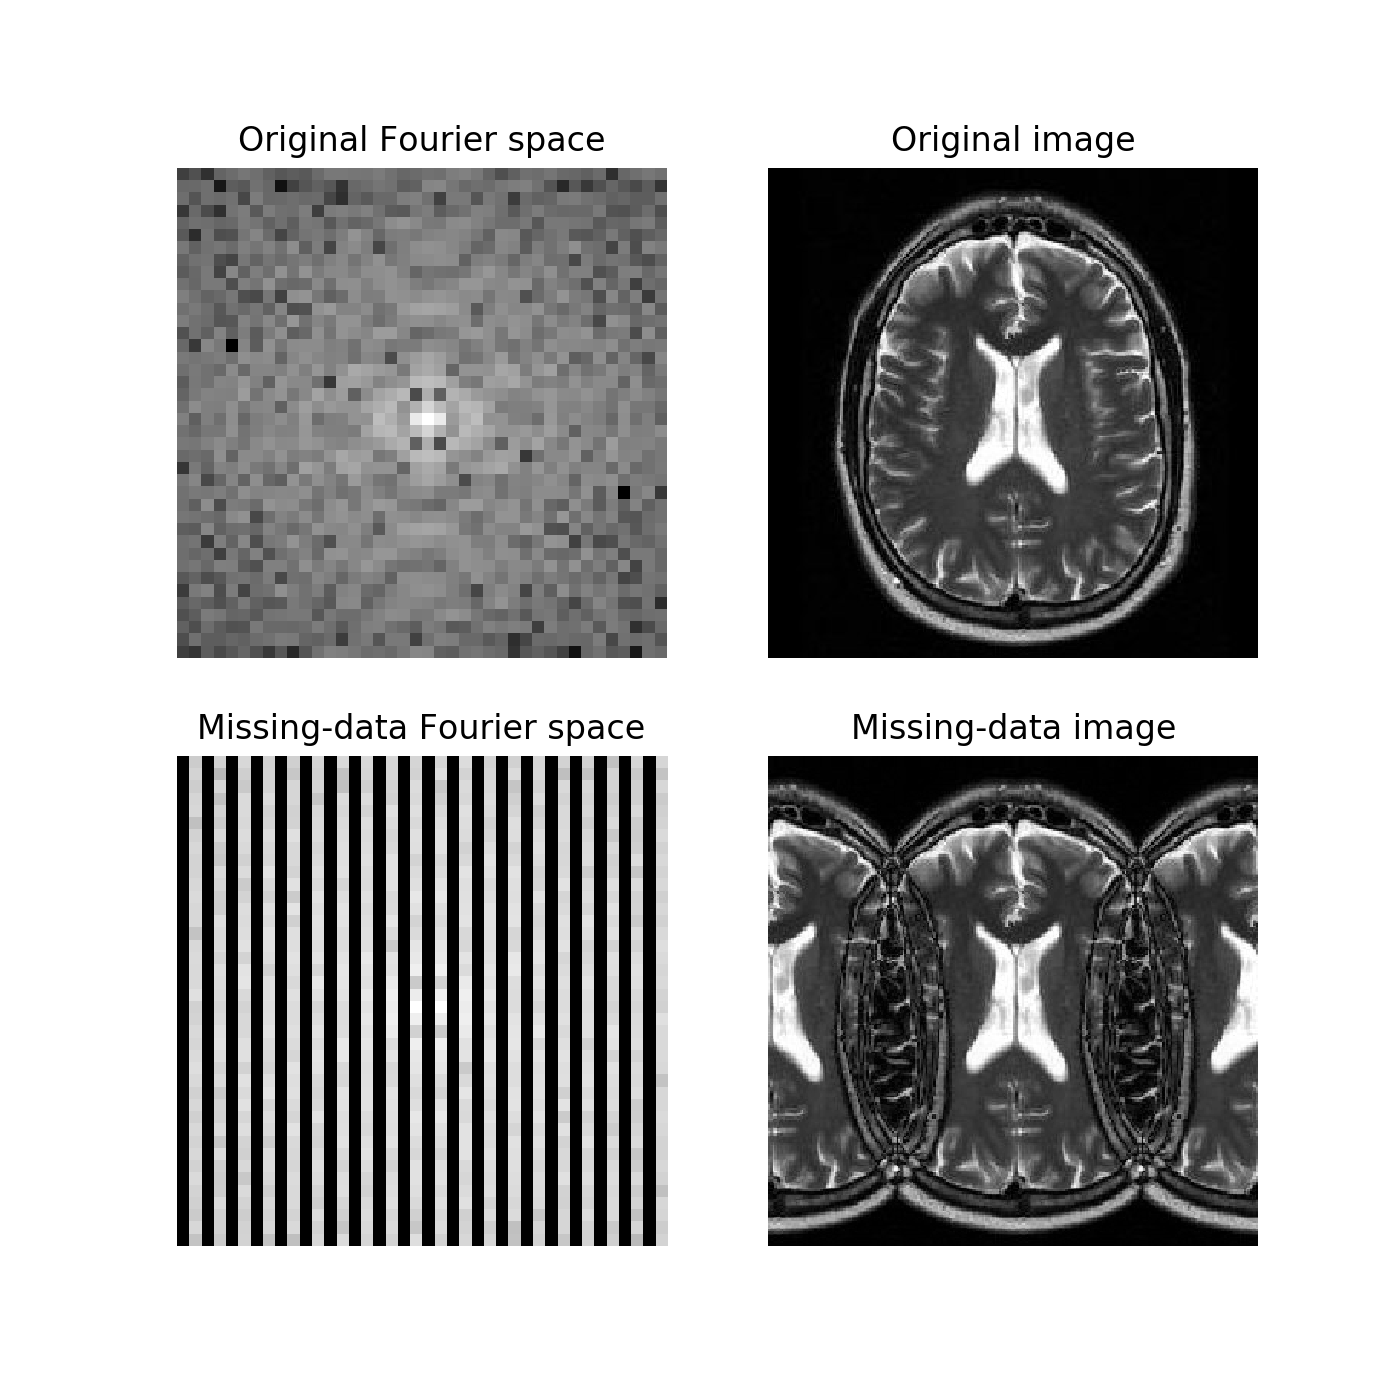

(-0.5, 319.5, 319.5, -0.5)

In [40]:
# Simulate missing data along some dimension
skip = 2
fhat2 = 0.0000001 + 0*fhat.copy(); 
fhat2[:,1::skip] = fhat[:,1::skip]
f2 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat2)))


# Display Fourier-space signal and reconstructed image
plt.figure(figsize=(7,7))
plt.subplot(2,2,1)
imgplot = plt.imshow(np.log(abs(fhat[140:180,140:180])),cmap='gray')
f2 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat2)))
plt.title('Original Fourier space')
plt.axis('off')
plt.subplot(2,2,2)
imgplot = plt.imshow(abs(f),cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.subplot(2,2,3)
imgplot = plt.imshow(np.log(abs(fhat2[140:180,140:180])),cmap='gray')
f2 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat2)))
plt.title('Missing-data Fourier space')
plt.axis('off')
plt.subplot(2,2,4)
imgplot = plt.imshow(abs(f2),cmap='gray')
plt.title('Missing-data image')
plt.axis('off')

## Propagation of motion artifacts in DFT reconstruction

<IPython.core.display.Javascript object>


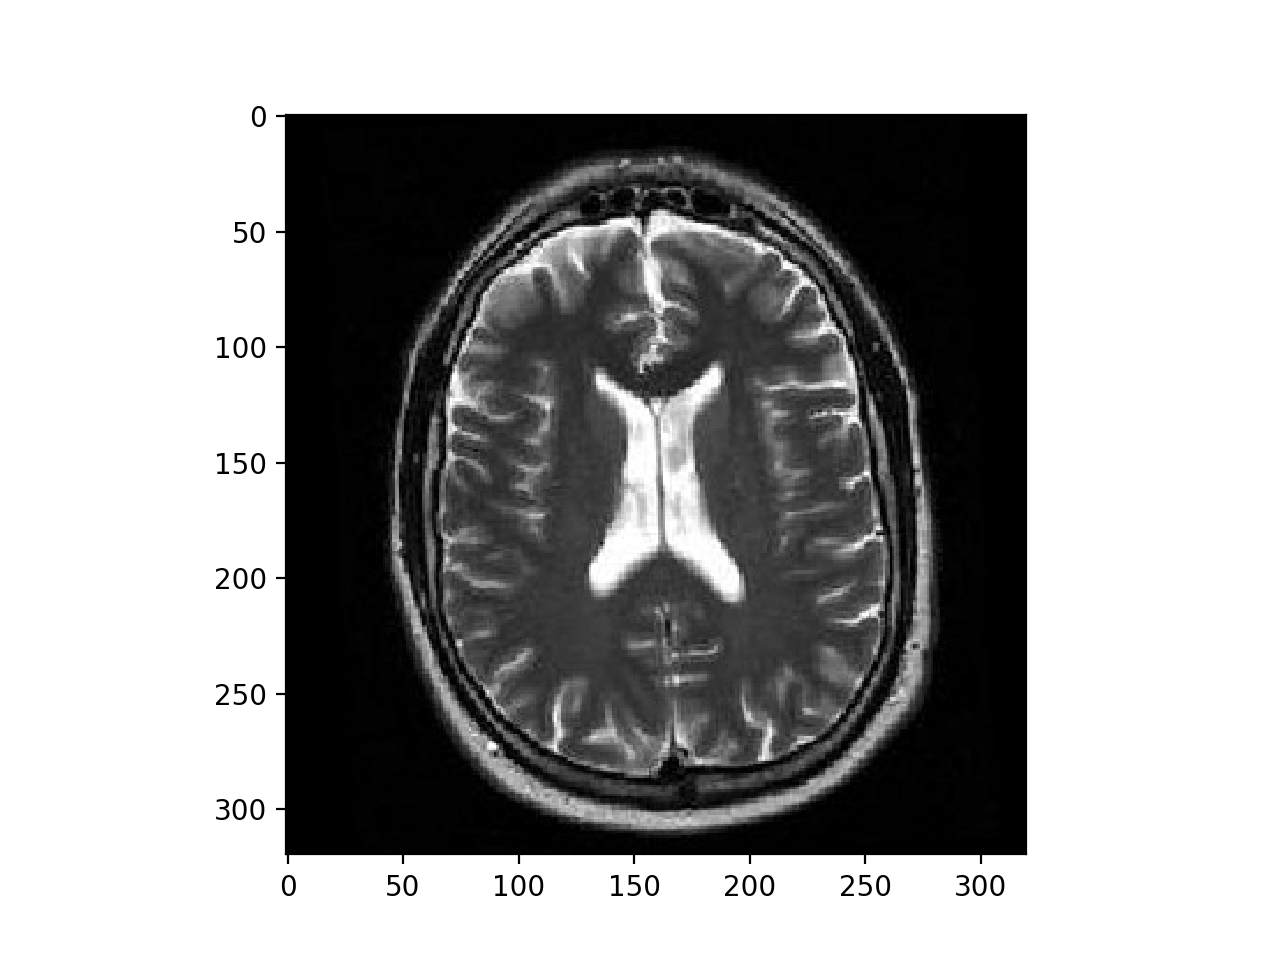

In [15]:
# Now add some motion with angle ROT_ANGLE and frequency ROT_FREQUENCY
ROT_ANGLE = 3
ROT_FREQUENCY = 0.05
f3hat = 0*fhat
fig = plt.figure()
ims = []
for k in range(0,sx):
#    myshift = np.int(np.round(8*np.sin(2*math.pi*0.02*k)))
#    f2 = np.roll(f,myshift,axis=0) # shift
    myrot = ROT_ANGLE*np.sin(2*math.pi*ROT_FREQUENCY*k)
    new_im = Image.fromarray(f)
    new_im2 = new_im.rotate(myrot,resample=Image.BICUBIC)
    f2 = np.array(new_im2)
    im = plt.imshow(abs(f2),cmap='gray',animated=True,vmin=0,vmax=1)
    
    ims.append([im])
    f2hat =  np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f2)))
    f3hat[:,k] = f2hat[:,k]
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=False,
                                repeat_delay=0)
plt.show()

<IPython.core.display.Javascript object>


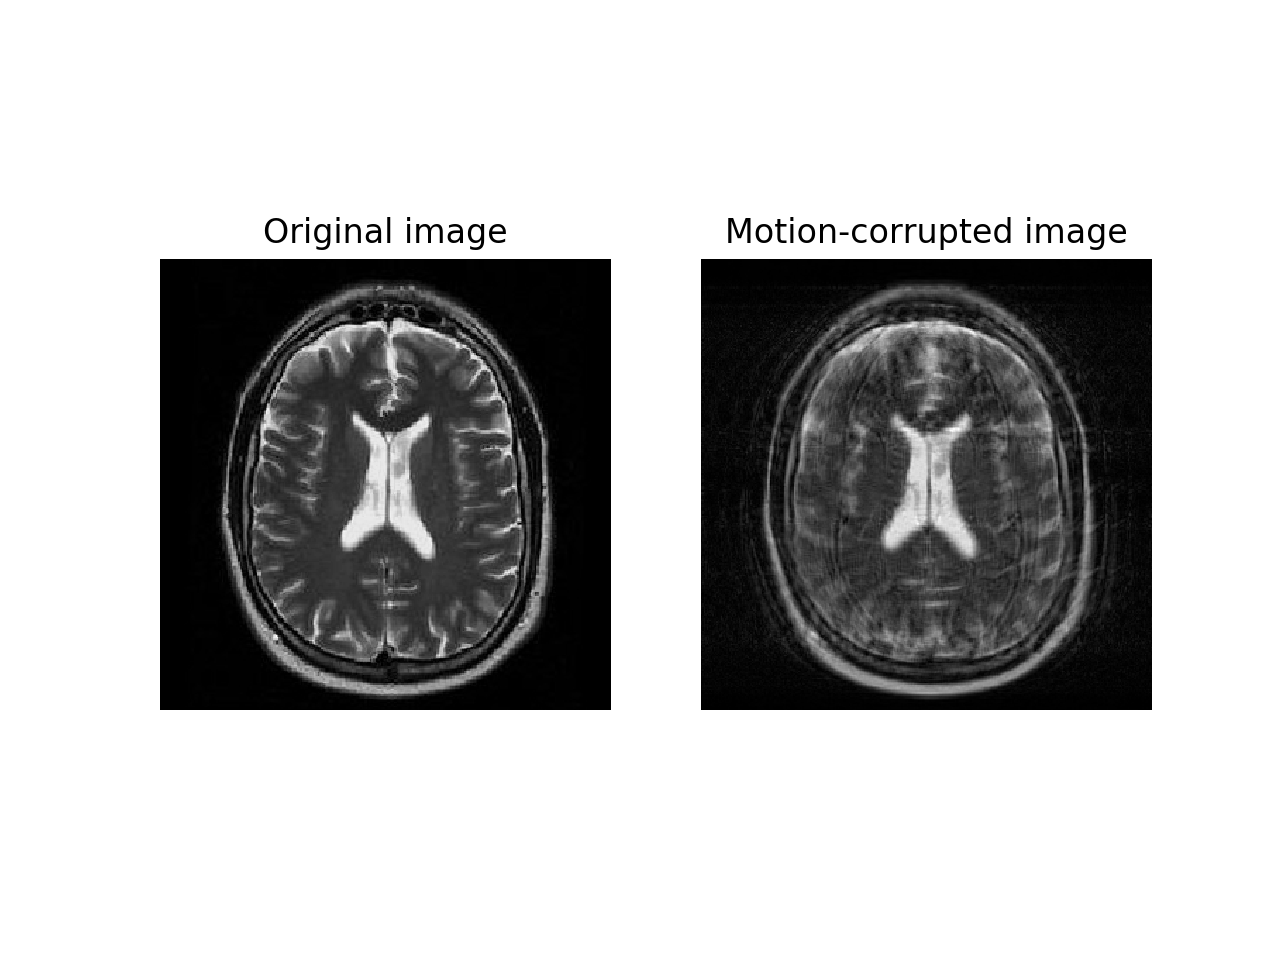

(-0.5, 319.5, 319.5, -0.5)

In [8]:
# Take our motion-corrupted data and reconstruct our image
f3 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(f3hat)))

# Display both the original and motion-corrupted images
fig2 = plt.figure()
plt.subplot(1,2,1)
imgplot = plt.imshow(abs(f2),cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.subplot(1,2,2)
imgplot = plt.imshow(abs(f3),cmap='gray')
plt.title('Motion-corrupted image')
plt.axis('off')




